# DATA ANALYSIS

In [81]:
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [82]:
data = pd.read_csv('Crop_recommendation.csv')

In [83]:
# Display top 5 rows of the dataset

In [84]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [85]:
# Find shape of our dataset (Number of rows and columns)

In [86]:
data.shape

(2200, 8)

In [87]:
print("Number of rows = ",data.shape[0])
print("Number of columns = ",data.shape[1])

Number of rows =  2200
Number of columns =  8


In [88]:
# Names of the columns

In [89]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [90]:
data.duplicated().sum()

0

In [91]:
# Number of null values in each column

In [92]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [93]:
# Number of rows and columns, datatypes and memory requirement

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [95]:
# Overall statistics of the dataset

In [96]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [97]:
# Number of unique data in each column

In [98]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [99]:
# Display unique data in a column

In [100]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [101]:
# Number of occurence of data in a column

In [102]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [103]:
crop_summary = pd.pivot_table(data,index=['label'],aggfunc='mean')
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


# DATA VISUALIZATION

In [104]:
import plotly.express as px

In [105]:
# Checking outliers

In [106]:
fig = px.box(data,y="N",points="all")
fig.show()

In [107]:
fig = px.box(data,y="P",points="all")
fig.show()

In [108]:
fig = px.box(data,y="K",points="all")
fig.show()

In [109]:
fig = px.box(data,y="humidity",points="all")
fig.show()

In [110]:
fig = px.box(data,y="ph",points="all")
fig.show()

In [111]:
fig = px.box(data,y="rainfall",points="all")
fig.show()

In [112]:
fig = px.box(data,y="temperature",points="all")
fig.show()

In [113]:
# Detection and removal of outliers of rainfall column

In [114]:
df_boston = data
df_boston.columns = df_boston.columns
df_boston.head()
print("Old shape : ",df_boston.shape)

Old shape :  (2200, 8)


In [115]:
# Detection of outliers

In [116]:
Q1 = np.percentile(df_boston['rainfall'],25,interpolation='midpoint')
Q3 = np.percentile(df_boston['rainfall'],75,interpolation='midpoint')
IQR = Q3-Q1

In [117]:
# Removal of outliers

In [118]:
upper = np.where(df_boston['rainfall'] >= (Q3+1.5*IQR))
lower = np.where(df_boston['rainfall'] <= (Q1-1.5*IQR))

df_boston.drop(upper[0],inplace=True)
df_boston.drop(lower[0],inplace=True)
print("New shape : ",df_boston.shape)

New shape :  (2101, 8)


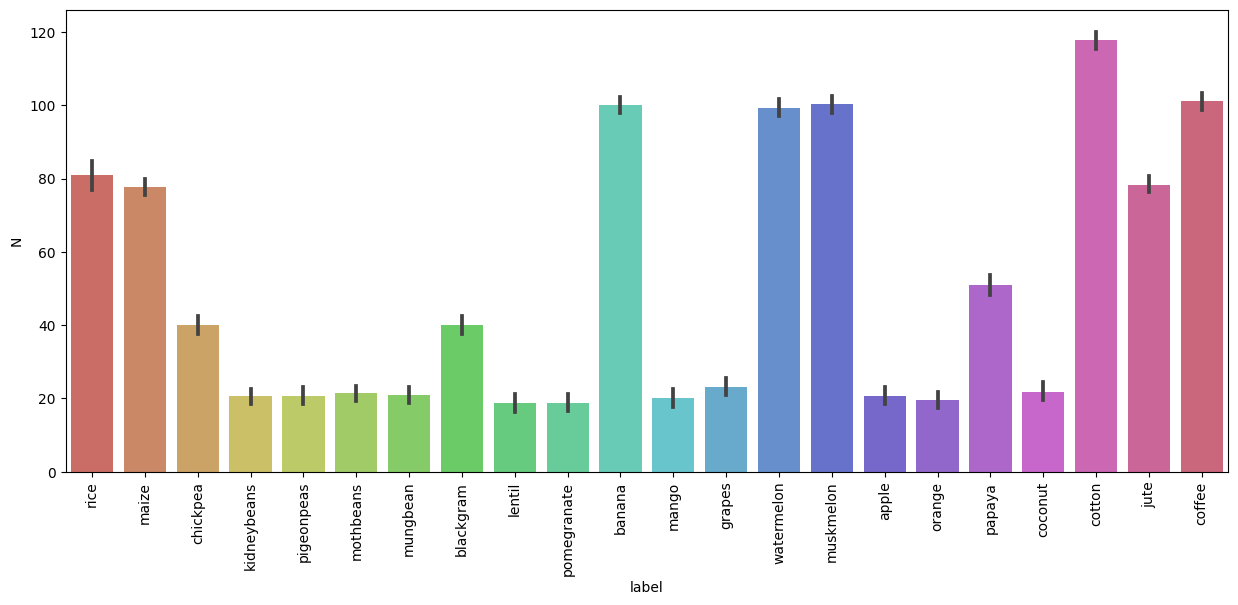

In [119]:
data = df_boston
plt.figure(figsize = (15,6))
sb.barplot(y='N',x='label',data = data,palette = 'hls')
plt.xticks(rotation=90)
plt.show()

In [120]:
crop_summary_new = data.copy()

In [121]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [122]:
fig1 = px.bar(crop_summary_new, x='label', y='N')
fig1.show()

In [123]:
fig1 = px.bar(crop_summary_new, x='label', y='P')
fig1.show()

In [124]:
fig1 = px.bar(crop_summary_new, x='label', y='K')
fig1.show()

In [125]:
fig1 = px.bar(crop_summary_new, x='label', y='temperature')
fig1.show()

In [126]:
fig1 = px.bar(crop_summary_new, x='label', y='humidity')
fig1.show()

In [127]:
fig1 = px.bar(crop_summary_new, x='label', y='ph')
fig1.show()

In [128]:
fig1 = px.bar(crop_summary_new, x='label', y='rainfall')
fig1.show()

In [129]:
import random
from IPython.core.display import update_display
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.237127,-0.139970,0.041633,0.189609,0.099238,0.003231
P,-0.237127,1.000000,0.737806,-0.133415,-0.111730,-0.146018,-0.046656
K,-0.139970,0.737806,1.000000,-0.165188,0.198119,-0.174559,-0.042466
temperature,0.041633,-0.133415,-0.165188,1.000000,0.203789,-0.021339,-0.039570
humidity,0.189609,-0.111730,0.198119,0.203789,1.000000,-0.005955,0.020846
ph,0.099238,-0.146018,-0.174559,-0.021339,-0.005955,1.000000,-0.127166
rainfall,0.003231,-0.046656,-0.042466,-0.039570,0.020846,-0.127166,1.000000


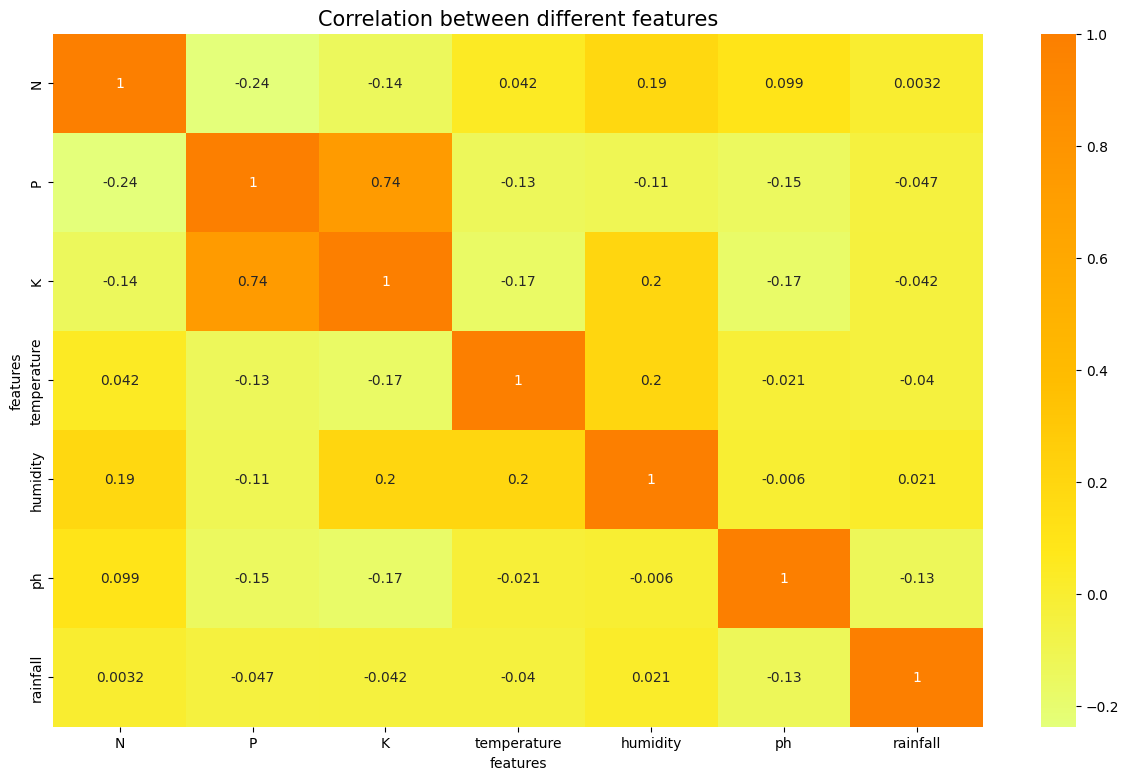

In [130]:
fig,ax = plt.subplots(1,1,figsize=(15,9))
sb.heatmap(data.corr(),annot=True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('Correlation between different features',fontsize=15,c='black')
plt.show()

In [131]:
# Store feature matrix (input) in x and response (output) in y

In [132]:
x = data.drop('label',axis=1)
y = data['label']

In [133]:
# Splitting dataset into training set and testing set

In [134]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,shuffle=True,random_state=0)

In [135]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(x_train, y_train)

LGBMClassifier()

In [136]:
y_pred = model.predict(x_test)

In [137]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)
print('LightGBM Model accuracy score : {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

LightGBM Model accuracy score : 0.9889


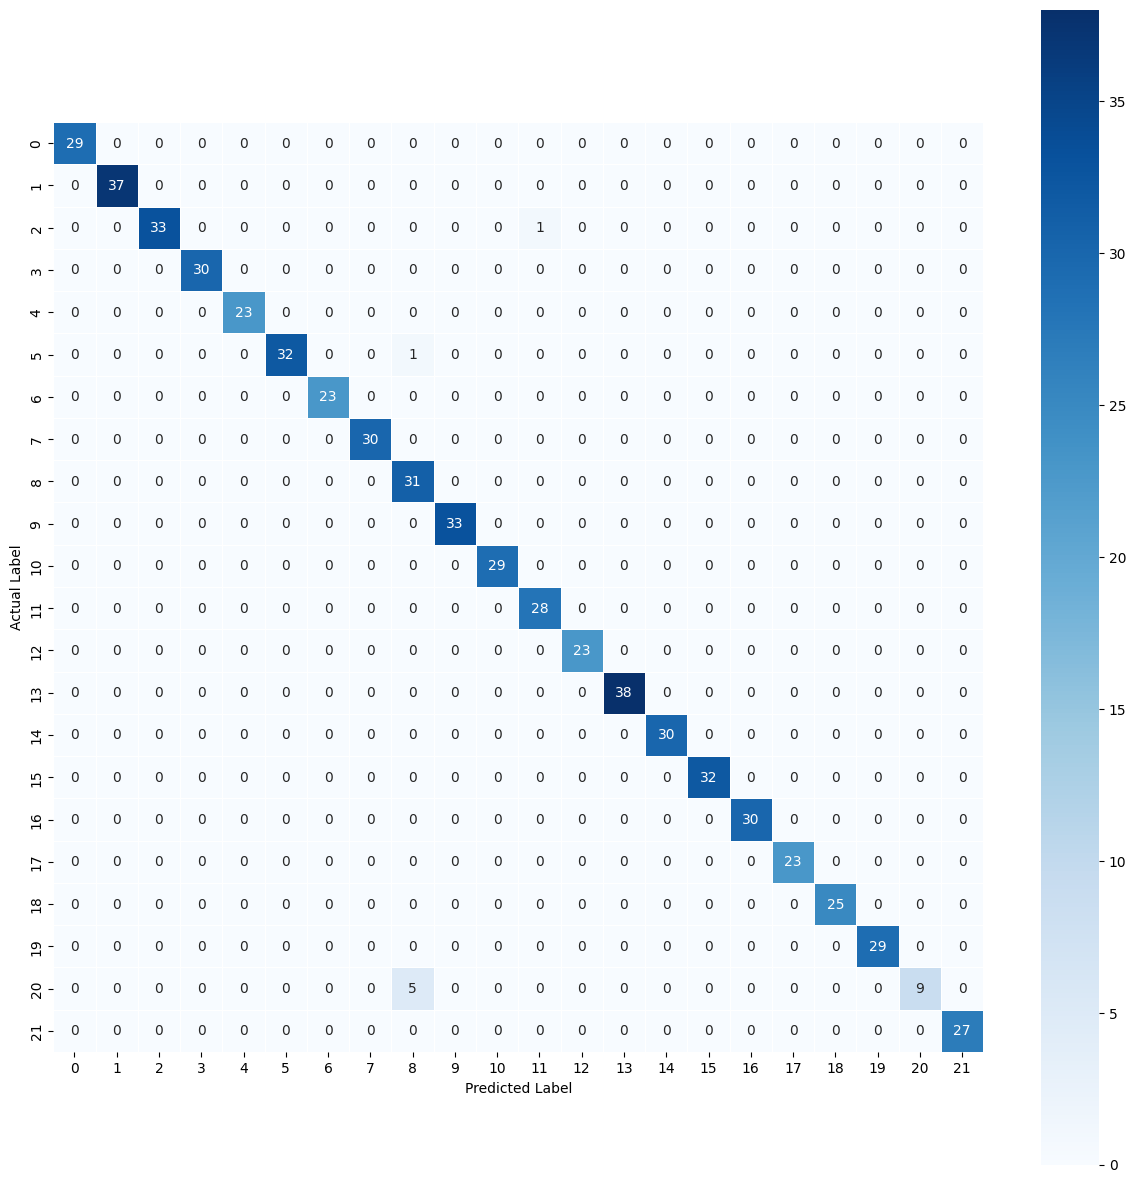

In [138]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15,15))
sb.heatmap(cm,annot=True,fmt=".0f",linewidth=.5,square=True,cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Confusion Matrix - Score : ' + str(accuracy_score(y_test,y_pred))
plt.show()

In [139]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

LightGBM Model accuracy score: 0.9889


In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        37
   blackgram       1.00      0.97      0.99        34
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        23
      coffee       1.00      0.97      0.98        33
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        30
        jute       0.84      1.00      0.91        31
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        29
       maize       0.97      1.00      0.98        28
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      1.00      1.00        38
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        32
      orange       1.00      1.00      1.00        30
      papaya       1.00    

In [141]:
# Using Decision Tree Classifier

In [142]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [143]:
# Save the model

In [144]:
dtc_final = classifier.fit(x_train,y_train)

In [145]:
y_pred = classifier.predict(x_test)

In [146]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

LightGBM Model accuracy score: 0.9905


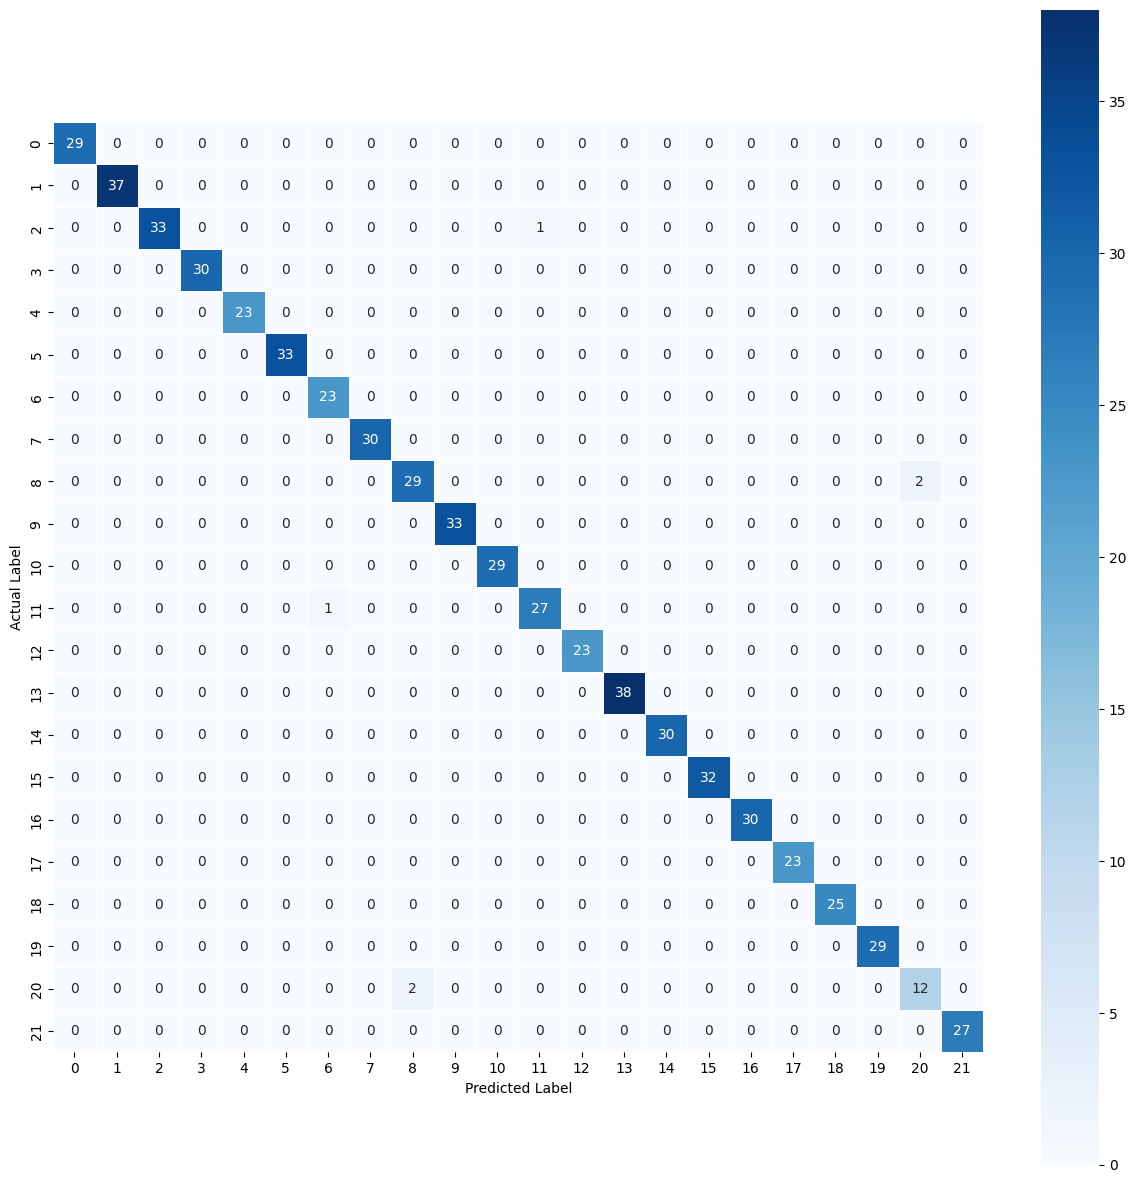

In [147]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15,15))
sb.heatmap(cm,annot=True,fmt=".0f",linewidth=.5,square=True,cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Confusion Matrix - Score : ' + str(accuracy_score(y_test,y_pred))
plt.show()

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        37
   blackgram       1.00      0.97      0.99        34
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        33
      cotton       0.96      1.00      0.98        23
      grapes       1.00      1.00      1.00        30
        jute       0.94      0.94      0.94        31
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        29
       maize       0.96      0.96      0.96        28
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      1.00      1.00        38
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        32
      orange       1.00      1.00      1.00        30
      papaya       1.00    

In [149]:
x_test[0:1]

,N,P,K,temperature,humidity,ph,rainfall
1203,36,125,196,37.465668,80.659687,6.155261,66.838723


In [150]:
result = classifier.predict(x_test[0:1])

In [151]:
result

array(['grapes'], dtype=object)

In [152]:
y_test[0:1]

1203    grapes
Name: label, dtype: object

In [153]:
# Prediction on new data

In [154]:
user_input = [[40,120,150,45.00,34.00,6.34,60.89]]
result = classifier.predict(user_input)
result

array(['chickpea'], dtype=object)

In [155]:
import pandas as pd
data_new = pd.DataFrame({
    'N':90,
    'P':42,
    'K':43,
    'temperature':20.00,
    'humidity':82.87,
    'ph':6.98,
    'rainfall':202.11,
},index=[0])

In [156]:
result = classifier.predict(data_new)
result

array(['rice'], dtype=object)

In [157]:
# Save decision tree model in scikit

In [162]:
from joblib import dump
dump(classifier, 'filename.json')